<a href="https://colab.research.google.com/github/random-words/colab-notebooks/blob/main/03__convolutional_neural_network_and_computer_vision_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

## Get data

In [5]:
# Get data
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2025-01-28 18:45:46--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.12.27, 172.217.164.27, 172.217.0.91, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.12.27|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  72.2MB/s    in 1.4s    

2025-01-28 18:45:48 (72.2 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Data visualization

In [2]:
!ls pizza_steak

test  train


In [3]:
!ls pizza_steak/train/

pizza  steak


In [4]:
!ls pizza_steak/train/steak

1000205.jpg  1598345.jpg  2062248.jpg  2548974.jpg  3030578.jpg  3571963.jpg  510757.jpg
100135.jpg   1598885.jpg  2081995.jpg  2549316.jpg  3047807.jpg  3576078.jpg  513129.jpg
101312.jpg   1600179.jpg  2087958.jpg  2561199.jpg  3059843.jpg  3577618.jpg  513842.jpg
1021458.jpg  1600794.jpg  2088030.jpg  2563233.jpg  3074367.jpg  3577732.jpg  523535.jpg
1032846.jpg  160552.jpg   2088195.jpg  256592.jpg   3082120.jpg  3578934.jpg  525041.jpg
10380.jpg    1606596.jpg  2090493.jpg  2568848.jpg  3094354.jpg  358042.jpg   534560.jpg
1049459.jpg  1615395.jpg  2090504.jpg  2573392.jpg  3095301.jpg  358045.jpg   534633.jpg
1053665.jpg  1618011.jpg  2125877.jpg  2592401.jpg  3099645.jpg  3591821.jpg  536535.jpg
1068516.jpg  1619357.jpg  2129685.jpg  2599817.jpg  3100476.jpg  359330.jpg   541410.jpg
1068975.jpg  1621763.jpg  2133717.jpg  2603058.jpg  3110387.jpg  3601483.jpg  543691.jpg
1081258.jpg  1623325.jpg  2136662.jpg  2606444.jpg  3113772.jpg  3606642.jpg  560503.jpg
1090122.jpg  1624450.

In [5]:
import os

# walk trough file and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(dirnames)} images in {dirpath}")

There are 2 directories and 2 images in pizza_steak
There are 2 directories and 2 images in pizza_steak/train
There are 0 directories and 0 images in pizza_steak/train/steak
There are 0 directories and 0 images in pizza_steak/train/pizza
There are 2 directories and 2 images in pizza_steak/test
There are 0 directories and 0 images in pizza_steak/test/steak
There are 0 directories and 0 images in pizza_steak/test/pizza


In [6]:
# Another way to tell how many files are in derectory
len(os.listdir("pizza_steak/train/steak"))

750

In [119]:
# Get the classnames programatically
import pathlib
import numpy as np

data_dir = pathlib.Path("pizza_steak/train/")
class_names = np.array(sorted(item.name for item in data_dir.glob("*")))
print(class_names)

['pizza' 'steak']


In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

In [7]:
def view_random_image(target_dir, target_class):
  target_folder = target_dir + target_class

  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}")
  return img

['980247.jpg']
Image shape: (384, 512, 3)


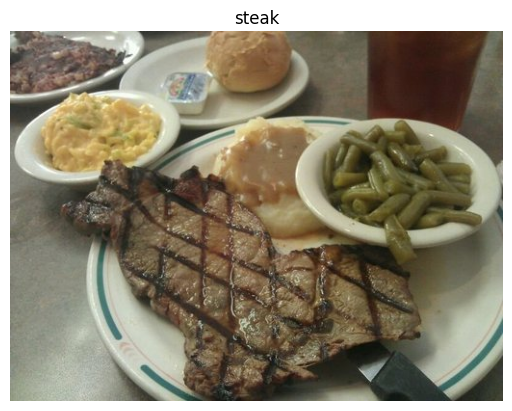

In [10]:
img = view_random_image("pizza_steak/train/", "steak")

array([[[121, 128, 120],
        [125, 132, 124],
        [136, 142, 132],
        ...,
        [111, 112,  94],
        [104, 103,  85],
        [ 96,  95,  77]],

       [[132, 139, 131],
        [133, 140, 132],
        [139, 145, 135],
        ...,
        [110, 111,  93],
        [105, 104,  86],
        [ 99,  98,  80]],

       [[122, 129, 121],
        [134, 141, 133],
        [153, 159, 149],
        ...,
        [110, 111,  93],
        [107, 106,  86],
        [104, 101,  82]],

       ...,

       [[142, 150, 126],
        [149, 157, 133],
        [146, 154, 131],
        ...,
        [ 65,  67,  53],
        [ 66,  68,  54],
        [ 65,  67,  53]],

       [[141, 149, 125],
        [148, 156, 132],
        [145, 153, 129],
        ...,
        [ 65,  67,  53],
        [ 63,  65,  51],
        [ 59,  61,  47]],

       [[140, 148, 124],
        [146, 154, 130],
        [143, 151, 127],
        ...,
        [ 65,  67,  53],
        [ 59,  61,  47],
        [ 53,  55,  41]]], dtype=uint8)
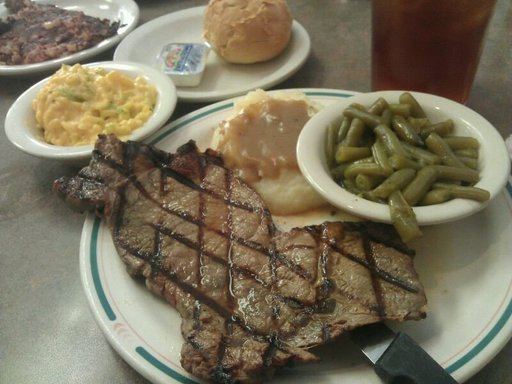

In [11]:
img

In [12]:
import tensorflow as tf
img = tf.cast(tf.constant(img), tf.float32)
img

<tf.Tensor: shape=(384, 512, 3), dtype=float32, numpy=
array([[[121., 128., 120.],
        [125., 132., 124.],
        [136., 142., 132.],
        ...,
        [111., 112.,  94.],
        [104., 103.,  85.],
        [ 96.,  95.,  77.]],

       [[132., 139., 131.],
        [133., 140., 132.],
        [139., 145., 135.],
        ...,
        [110., 111.,  93.],
        [105., 104.,  86.],
        [ 99.,  98.,  80.]],

       [[122., 129., 121.],
        [134., 141., 133.],
        [153., 159., 149.],
        ...,
        [110., 111.,  93.],
        [107., 106.,  86.],
        [104., 101.,  82.]],

       ...,

       [[142., 150., 126.],
        [149., 157., 133.],
        [146., 154., 131.],
        ...,
        [ 65.,  67.,  53.],
        [ 66.,  68.,  54.],
        [ 65.,  67.,  53.]],

       [[141., 149., 125.],
        [148., 156., 132.],
        [145., 153., 129.],
        ...,
        [ 65.,  67.,  53.],
        [ 63.,  65.,  51.],
        [ 59.,  61.,  47.]],

       [[140., 14

In [13]:
# Scale image values to be between 0 & 1
img / 255.

<tf.Tensor: shape=(384, 512, 3), dtype=float32, numpy=
array([[[0.4745098 , 0.5019608 , 0.47058824],
        [0.49019608, 0.5176471 , 0.4862745 ],
        [0.53333336, 0.5568628 , 0.5176471 ],
        ...,
        [0.43529412, 0.4392157 , 0.36862746],
        [0.40784314, 0.40392157, 0.33333334],
        [0.3764706 , 0.37254903, 0.3019608 ]],

       [[0.5176471 , 0.54509807, 0.5137255 ],
        [0.52156866, 0.54901963, 0.5176471 ],
        [0.54509807, 0.5686275 , 0.5294118 ],
        ...,
        [0.43137255, 0.43529412, 0.3647059 ],
        [0.4117647 , 0.40784314, 0.3372549 ],
        [0.3882353 , 0.38431373, 0.3137255 ]],

       [[0.47843137, 0.5058824 , 0.4745098 ],
        [0.5254902 , 0.5529412 , 0.52156866],
        [0.6       , 0.62352943, 0.58431375],
        ...,
        [0.43137255, 0.43529412, 0.3647059 ],
        [0.41960785, 0.41568628, 0.3372549 ],
        [0.40784314, 0.39607844, 0.32156864]],

       ...,

       [[0.5568628 , 0.5882353 , 0.49411765],
        [0.58

## An end-to-end example

In [30]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [12]:
# Set random seed
tf.random.set_seed(42)

# Preprocess data (to be between 0 & 1, a.k.a. scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1/255.)
valid_datagen = ImageDataGenerator(rescale=1/255.)

# Setup paths to files
train_dir = "/content/pizza_steak/train"
test_dir = "/content/pizza_steak/test"

# Import data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [17]:
# Build a CNN Model
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224, 224, 3),),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    # break down conv layer and its activation function into 2 lines of code
    tf.keras.layers.Conv2D(10, 3),
    tf.keras.layers.Activation(tf.nn.relu),

    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile a model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
len(train_data)

47

In [19]:
# all of the train data / batch size
1500 / 32

46.875

In [20]:
# Fit model
# just train_data and not X & y, because train_data object
# already do that splitting for us
history_1 = model_1.fit(train_data, epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 18s 215ms/step - accuracy: 0.6038 - loss: 0.6521 - val_accuracy: 0.8140 - val_loss: 0.3977
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/5


/usr/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 123ms/step - accuracy: 0.7795 - loss: 0.4687 - val_accuracy: 0.8480 - val_loss: 0.3646
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 117ms/step - accuracy: 0.8156 - loss: 0.4076 - val_accuracy: 0.8740 - val_loss: 0.3352


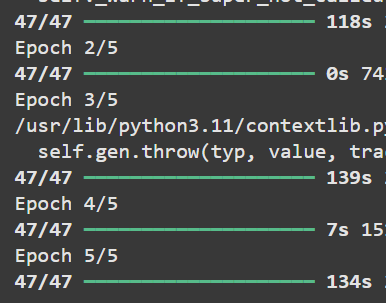

In [21]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 220, 220, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 110, 110, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 108, 108, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 106, 106, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 106, 106, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 53, 53, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 28090)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │          28,091 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,305 (364.48 KB)

 Trainable params: 31,101 (121.49 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 62,204 (242.99 KB)

## Using tha same model as before

In [22]:
# Set random seed
tf.random.set_seed(42)

# Create a model, that built before for classification problem
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid"),
])

model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"]
)

history_2 = model_2.fit(train_data, epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 132ms/step - accuracy: 0.4724 - loss: 2.0918 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 290us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 103ms/step - accuracy: 0.4960 - loss: 0.6933 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 293us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 110ms/step - accuracy: 0.4978 - loss: 0.6933 - val_accuracy: 0.5000 - val_loss: 0.6932


In [23]:
model_2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 150528)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │         602,116 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,806,425 (6.89 MB)

 Trainable params: 602,141 (2.30 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,204,284 (4.59 MB)

In [24]:
# Upgrading model_2: adding more layers and units

tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid"),
])

model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_3 = model_3.fit(train_data, epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 138ms/step - accuracy: 0.5998 - loss: 3.9234 - val_accuracy: 0.6780 - val_loss: 2.1863
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step - accuracy: 0.7012 - loss: 1.3020 - val_accuracy: 0.6460 - val_loss: 1.0253
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 264us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - accuracy: 0.7804 - loss: 0.6362 - val_accuracy: 0.7900 - val_loss: 0.4468


In [25]:
model_3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 150528)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 100)                 │      15,052,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 45,219,605 (172.50 MB)

 Trainable params: 15,073,201 (57.50 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 30,146,404 (115.00 MB)

## Breaking down binary classification

In [45]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [46]:
# Get data
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

# Set random seed
tf.random.set_seed(42)

# Preprocess data (to be between 0 & 1, a.k.a. scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1/255.)
valid_datagen = ImageDataGenerator(rescale=1/255.)

# Setup paths to files
train_dir = "/content/pizza_steak/train"
test_dir = "/content/pizza_steak/test"

# Import data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

--2025-01-28 20:02:43--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.164.27, 172.217.0.91, 172.217.12.27, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.164.27|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip.2’

pizza_steak.zip.2   100%[===================>] 104.47M   291MB/s    in 0.4s    

2025-01-28 20:02:43 (291 MB/s) - ‘pizza_steak.zip.2’ saved [109540975/109540975]

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


### Exploratory Data Analysis

['3576078.jpg']
Image shape: (512, 512, 3)
['1412034.jpg']
Image shape: (512, 512, 3)


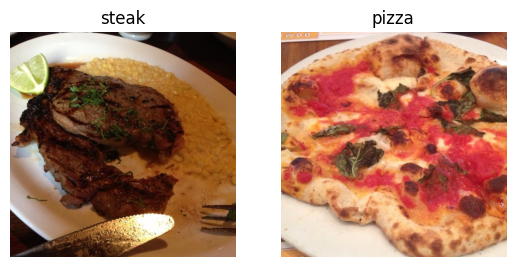

In [27]:
# Visualize data
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

### Data Preprocessing

In [28]:
# Define directorys
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

In [60]:
# Create train and test data generators and rescale data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [61]:
# Load in images and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224),
                                               class_mode="binary", # type of data you're working with
                                               batch_size=32)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [42]:
# Get samples of a train data batch
images, labels = next(train_data) # get "next" batch of images/labels
len(images), len(labels)

(32, 32)

In [43]:
len(train_data)

47

In [45]:
# get first two images
images[:2], images[0].shape

(array([[[[0.47450984, 0.29803923, 0.21568629],
          [0.5294118 , 0.34117648, 0.25490198],
          [0.5176471 , 0.3137255 , 0.227451  ],
          ...,
          [0.52156866, 0.30588236, 0.3254902 ],
          [0.5411765 , 0.32941177, 0.32941177],
          [0.50980395, 0.29803923, 0.2901961 ]],
 
         [[0.5411765 , 0.35686275, 0.2784314 ],
          [0.58431375, 0.39607847, 0.30980393],
          [0.52156866, 0.31764707, 0.23137257],
          ...,
          [0.5411765 , 0.3254902 , 0.34509805],
          [0.5254902 , 0.30980393, 0.32156864],
          [0.5372549 , 0.3254902 , 0.3254902 ]],
 
         [[0.5686275 , 0.38823533, 0.29803923],
          [0.5254902 , 0.3254902 , 0.24313727],
          [0.5529412 , 0.34901962, 0.2627451 ],
          ...,
          [0.5294118 , 0.32156864, 0.34509805],
          [0.5137255 , 0.30980393, 0.31764707],
          [0.5254902 , 0.3254902 , 0.32156864]],
 
         ...,
 
         [[0.5882353 , 0.43529415, 0.6509804 ],
          [0.61176

In [46]:
# View first batch of labels
labels

array([1., 1., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.],
      dtype=float32)

### Create CNN model (start with baseline)

In [49]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [62]:
# Make writing eastier
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras.optimizers import Adam

In [63]:
# Create a model
model_4 = Sequential([
    Conv2D(filters=10, # number of sliding windows (where kernel is running by setted up step) going across an input
           kernel_size=3, # size of sliding input going across an input
           strides=1, # size of the step the sliding window takes across an input
           padding="valid", # if "same": output shape = input shape, if "valid": output shape gets compressed
           activation="relu",
           input_shape=(224, 224, 3)), # input layer (explicitly indicate input shape)
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    Flatten(),
    Dense(1, activation="sigmoid") # output shape (binary classification hence only 1 output neuron)
])

In [64]:
# Compile it
model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

### Fit model

In [25]:
len(train_data), len(test_data)

(47, 16)

In [65]:
history_4 = model_4.fit(
    train_data, # X & y alread
    epochs=5,
    steps_per_epoch=len(train_data),
    validation_data=test_data,
)

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 133s 3s/step - accuracy: 0.5653 - loss: 1.2513 - val_accuracy: 0.7700 - val_loss: 0.4924
Epoch 2/5


/usr/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


47/47 ━━━━━━━━━━━━━━━━━━━━ 13s 282ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.7700 - val_loss: 0.4924
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 188s 3s/step - accuracy: 0.7805 - loss: 0.4669 - val_accuracy: 0.7600 - val_loss: 0.5190
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 14s 288ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.7600 - val_loss: 0.5190
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 131s 3s/step - accuracy: 0.8790 - loss: 0.3297 - val_accuracy: 0.8280 - val_loss: 0.4066


### Model Evaluation

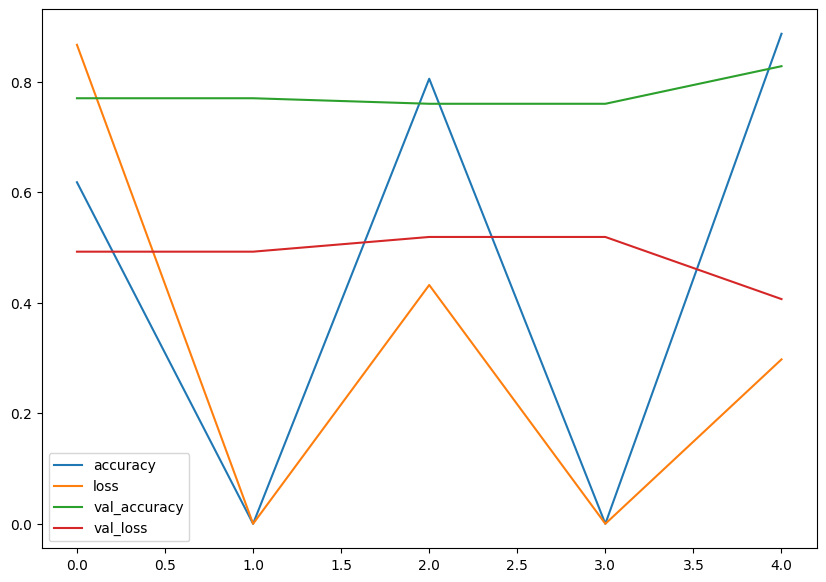

In [66]:
# Plot the training curves
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10, 7));

In [51]:
# Plot curves seperately
def plot_loss_curves(history):

  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  # plot loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("training loss")
  plt.xlabel("epochs")
  plt.legend()

  # plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

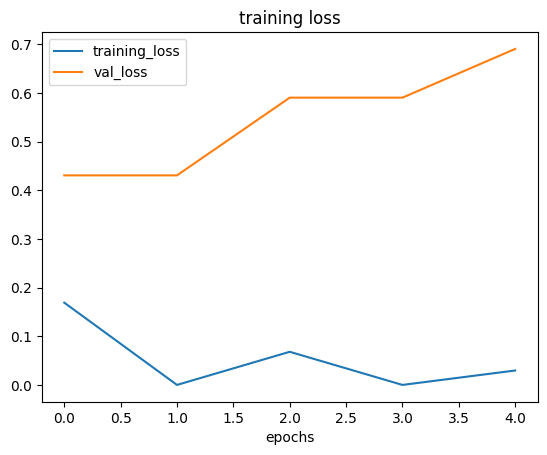

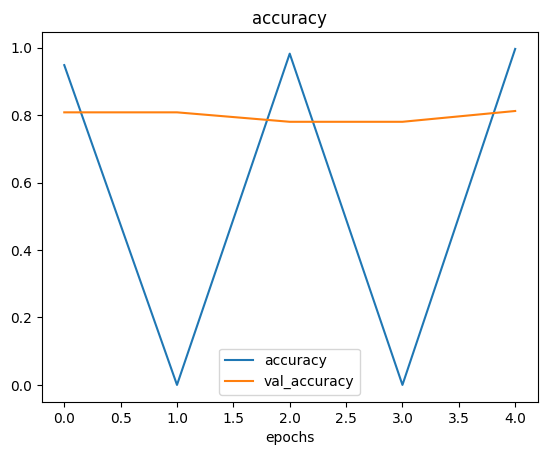

In [38]:
plot_loss_curves(history_4)

In [39]:
model_4.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 220, 220, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 218, 218, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 475240)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │         475,241 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,432,025 (5.46 MB)

 Trainable params: 477,341 (1.82 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 954,684 (3.64 MB)

### Adjust model paramethers

In [52]:
# Create new baseline model
model_5 = Sequential([
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size=2),
    Flatten(),
    Dense(1, activation="sigmoid")
])

In [53]:
# Compile model
model_5.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [54]:
# Fit model
history_5 = model_5.fit(train_data, epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=test_data)

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 60s 1s/step - accuracy: 0.6256 - loss: 0.6513 - val_accuracy: 0.8200 - val_loss: 0.4090
Epoch 2/5


/usr/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 127ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8200 - val_loss: 0.4090
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 74s 1s/step - accuracy: 0.7766 - loss: 0.4688 - val_accuracy: 0.8060 - val_loss: 0.4203
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 121ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8060 - val_loss: 0.4203
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.8211 - loss: 0.4197 - val_accuracy: 0.8320 - val_loss: 0.3677


In [55]:
model_5.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 111, 111, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 109, 109, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 54, 54, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 52, 52, 10)          │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 26, 26, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 6760)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │           6,761 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26,585 (103.85 KB)

 Trainable params: 8,861 (34.61 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 17,724 (69.24 KB)

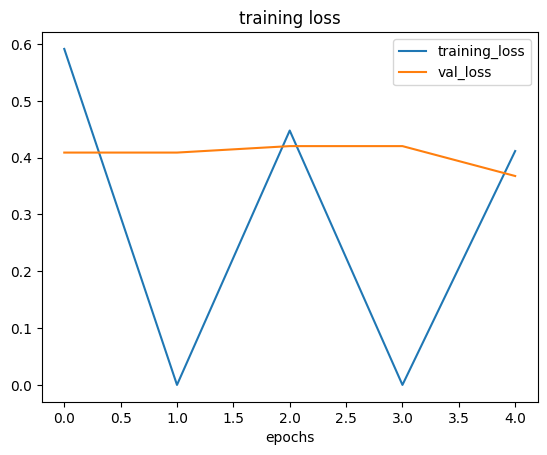

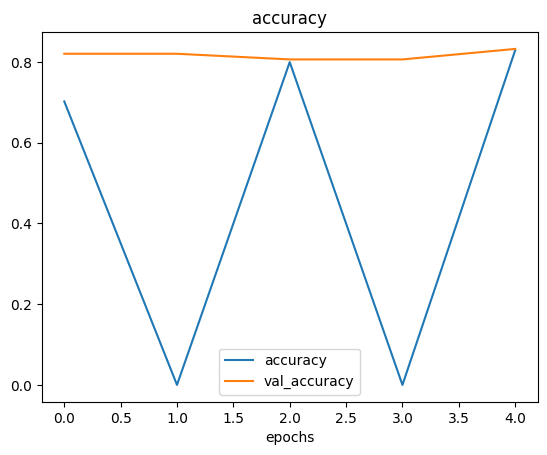

In [57]:
plot_loss_curves(history_5)

### Data Augmentation

* Data augmentation usually only performed on the **training data**

In [84]:
# Create train ImageDataGenerator with augmentation tuning
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.3,
                                             horizontal_flip=True)

# Recreate train ImageDataGenerator without augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Recreate test ImageDataGenerator without augmentation
test_datagen = ImageDataGenerator(rescale=1/255.)

In [86]:
# Import data and augmented it
print("Augmented training data:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   class_mode="binary",
                                                                   batch_size=32,
                                                                   shuffle=False) # for demo


# Non-augmented train data
print("Non-augmented training data:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               batch_size=32,
                                               shuffle=False) # for demo

# Non-augmented test data
print("Non-augmented test data:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             class_mode="binary",
                                             batch_size=32)

Augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented test data:
Found 500 images belonging to 2 classes.


In [74]:
import os
len(os.listdir("pizza_steak/train/pizza"))

750

In [75]:
# Get non augmented data
images, labels = next(train_data)

# Get augmented data
augmented_images, augmented_labels = next(train_data_augmented)

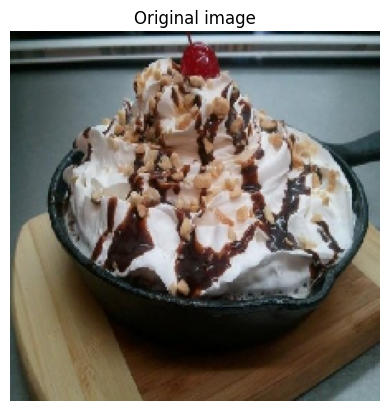

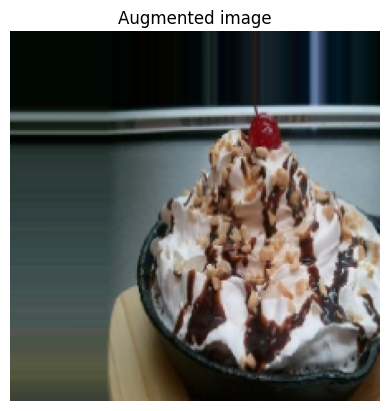

In [76]:
# Show original image and augmented image
import random
random_number = random.randint(0, 32)

plt.imshow(images[random_number])
plt.title("Original image")
plt.axis(False)

plt.figure()
plt.imshow(augmented_images[random_number])
plt.title("Augmented image")
plt.axis(False);

### Using augmented data

In [79]:
# Create new baseline model
model_6 = Sequential([
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size=2),
    Flatten(),
    Dense(1, activation="sigmoid")
])

In [80]:
# Compile model
model_6.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [81]:
# Fit model
history_6 = model_6.fit(train_data_augmented, epochs=5,
            steps_per_epoch=len(train_data_augmented),
            validation_data=test_data)

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 74s 1s/step - accuracy: 0.6677 - loss: 0.7928 - val_accuracy: 0.5000 - val_loss: 0.7836
Epoch 2/5


/usr/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 161ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 0.7836
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - accuracy: 0.5795 - loss: 0.6986 - val_accuracy: 0.7040 - val_loss: 0.6770
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 112ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.7040 - val_loss: 0.6770
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 75s 1s/step - accuracy: 0.5973 - loss: 0.7005 - val_accuracy: 0.5680 - val_loss: 0.6713


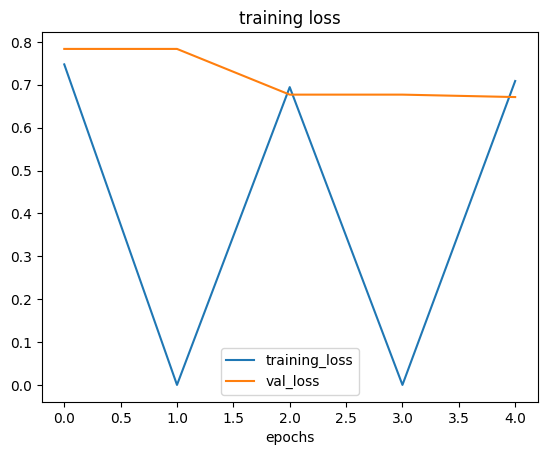

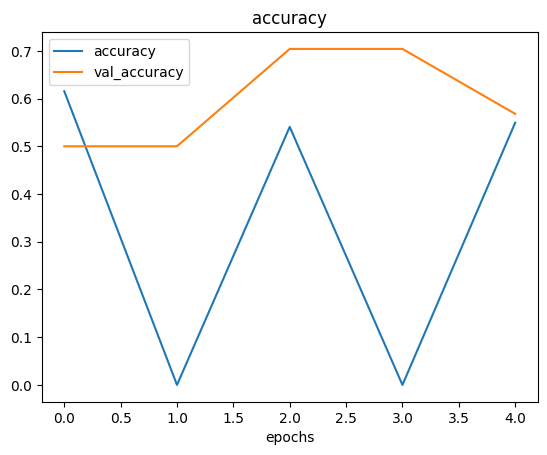

In [82]:
# plot model training curves
plot_loss_curves(history_6)

In [88]:
# shuffle the augmented data
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   class_mode="binary",
                                                                   batch_size=32)

Found 1500 images belonging to 2 classes.


In [89]:
model_7 = Sequential([
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

In [90]:
model_7.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [92]:
history_7 = model_7.fit(train_data_augmented_shuffled, epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data)

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 74s 1s/step - accuracy: 0.5573 - loss: 0.6731 - val_accuracy: 0.6820 - val_loss: 0.5824
Epoch 2/5


/usr/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 124ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6820 - val_loss: 0.5824
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 74s 1s/step - accuracy: 0.6850 - loss: 0.5781 - val_accuracy: 0.7260 - val_loss: 0.4992
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 130ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.7260 - val_loss: 0.4992
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 76s 1s/step - accuracy: 0.7228 - loss: 0.5396 - val_accuracy: 0.8420 - val_loss: 0.3740


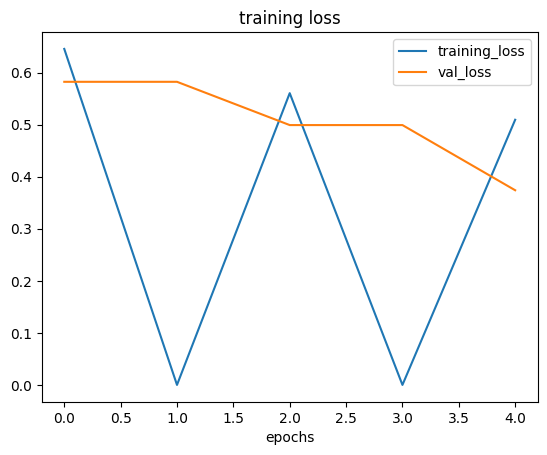

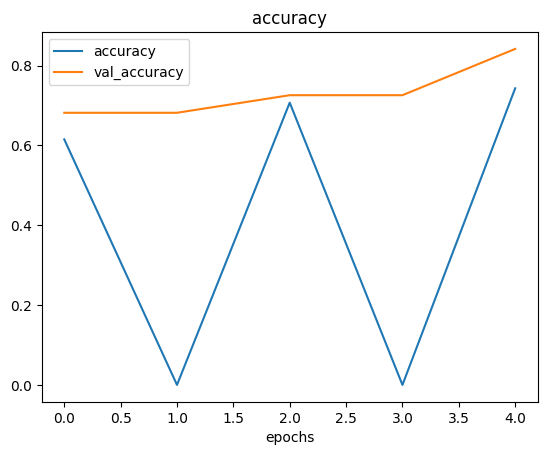

In [93]:
plot_loss_curves(history_7)

### Hyperparamethers tuning

We've trained a few model's on our dataset already and so far they're performing pretty good.

Since we've already beaten our baseline, there are a few things we could try to continue to improve our model:

* Increase the number of model layers (e.g. add more convolutional layers).
* Increase the number of filters in each convolutional layer (e.g. from 10 to 32, 64, or 128, these numbers aren't set in stone either, they are usually found through trial and error).
* Train for longer (more epochs).
* Finding an ideal learning rate.
* Get more data (give the model more opportunities to learn).
* Use transfer learning to leverage what another image model has learned and adjust it for our own use case.

### Making predictions on our data

In [97]:
# Get custom image
import matplotlib.image as mpimg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/refs/heads/main/images/03-steak.jpeg

steak = mpimg.imread("03-steak.jpeg")

--2025-01-28 21:47:45--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/refs/heads/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg.2’

03-steak.jpeg.2     100%[===================>]   1.89M  --.-KB/s    in 0.1s    

2025-01-28 21:47:45 (19.0 MB/s) - ‘03-steak.jpeg.2’ saved [1978213/1978213]



(-0.5, 3023.5, 4031.5, -0.5)

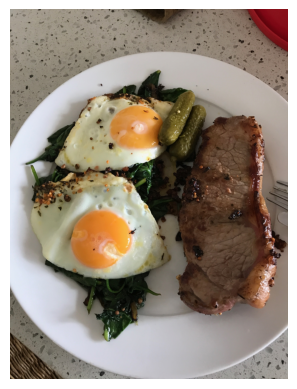

In [98]:
plt.imshow(steak)
plt.axis(False)

In [99]:
steak.shape

(4032, 3024, 3)

In [113]:
# Create helper function to import and load file
def load_and_prep_img(filename, input_shape=224):

  # Read in image
  img = tf.io.read_file(filename)
  # Decode file into a tensor
  img = tf.image.decode_image(img)
  # Resize image
  img = tf.image.resize(img, size=[input_shape, input_shape])
  # Scale image
  img = img / 255.

  return img

In [114]:
# use function to read and preprocess file
steak = load_and_prep_img("./03-steak.jpeg")

In [115]:
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [117]:
pred = model_7.predict(tf.expand_dims(steak, axis=0))
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


array([[0.9326925]], dtype=float32)

In [120]:
class_names

array(['pizza', 'steak'], dtype='<U5')

In [121]:
# 0 for pizza, 1 for steak
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [122]:
def pred_and_plot(model, filename, class_names=class_names):

  # Load image
  img = load_and_prep_img(filename)

  # Make prediction
  pred = model.predict(tf.expand_dims(img, axis=0))
  pred_class = class_names[int(tf.round(pred))]

  # Plot image and class
  plt.imshow(img)
  plt.title(f"{pred_class}")
  plt.axis(False)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


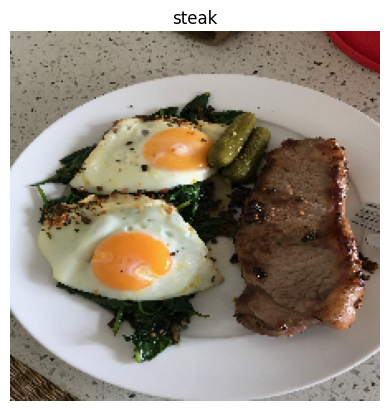

In [123]:
pred_and_plot(model_7, "03-steak.jpeg")

In [124]:
# Another prediction
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/refs/heads/main/images/03-pizza-dad.jpeg

pizza = mpimg.imread("03-pizza-dad.jpeg")
pizza

--2025-01-28 22:19:30--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/refs/heads/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.1s    

2025-01-28 22:19:31 (24.3 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]



array([[[154, 171, 119],
        [173, 190, 138],
        [181, 193, 147],
        ...,
        [ 21,  22,  17],
        [ 18,  19,  14],
        [ 14,  15,  10]],

       [[146, 163, 111],
        [165, 182, 130],
        [181, 193, 145],
        ...,
        [ 21,  22,  17],
        [ 18,  19,  14],
        [ 15,  16,  11]],

       [[124, 141,  87],
        [146, 163, 111],
        [172, 184, 136],
        ...,
        [ 18,  19,  14],
        [ 17,  18,  13],
        [ 15,  16,  11]],

       ...,

       [[ 72,  55,  35],
        [ 59,  42,  22],
        [ 45,  28,   8],
        ...,
        [152, 107,  52],
        [150, 104,  52],
        [148, 103,  48]],

       [[ 64,  47,  27],
        [ 55,  38,  18],
        [ 41,  24,   4],
        ...,
        [150, 108,  50],
        [147, 104,  49],
        [144, 102,  44]],

       [[ 64,  47,  27],
        [ 60,  43,  23],
        [ 46,  29,   9],
        ...,
        [149, 107,  49],
        [146, 104,  46],
        [143, 101,  43]]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


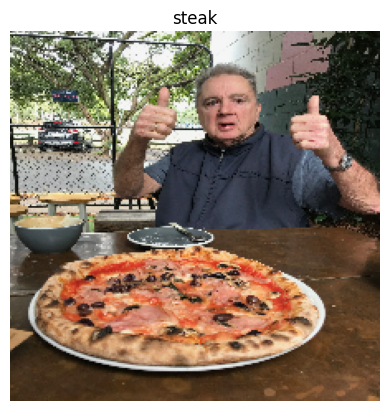

In [128]:
pred_and_plot(model_7, "03-pizza-dad.jpeg")